# Assignment 10 :- Recommendation System. 
## Dataset :- "Books"
## Short view about Recommendation System :- 
Recommender systems are machine learning systems that help users discover new product and services. Every time you shop online, a  recommendation system is guiding you towards the most likely product you might purchase.
### Cosine Similarity: 
Measures the cosine of the angle between two vectors. It is a judgment of orientation rather than magnitude between two vectors with respect to the origin. The cosine of 0 degrees is 1 which means the data points are similar and cosine of 90 degrees is 0 which means data points are dissimilar.
Cosine similarity is subjective to the domain and application and is not an actual distance metric. For example data points [1,2] and [100,200], are shown as similar with cosine similarity, whereas the Euclidean distance measure shows them as being far away from each other (i.e., they are dissimilar).
### Advantages: 
Works even when a product has no user reviews.
### Disadvantages: 
Requires descriptive data of all content to recommend, which is time consuming. It's also difficult to implement on large product databases as user’s have different opinions about each item.

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
book = pd.read_csv(r"D:\Data Science Material\Assignments\Recommender System\book.csv",encoding='ISO-8859-1')

In [3]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
book.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [5]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [7]:
# making original data safe
books = book.copy()      # first var. for 1st algo.

### Data Analysis

In [8]:
books.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [9]:
books['Book.Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [10]:
books.shape

(10000, 4)

### Data Cleaning / Applying Recommendation System

In [11]:
# Renaming the cols
books = book.rename(columns={'Book.Title':'Title','Book.Rating':'Rating','User.ID':'UserID'})

In [12]:
# droping the unwanted cols 
books.drop(['Unnamed: 0'],inplace=True,axis=1)

In [13]:
# making original data safe
books02 = books.copy()   # created second var. for second method / algorithm

In [14]:
# no. of unique user in the data set
len(books.UserID.unique())

2182

In [15]:
# finding lenght of perticuler cols
len(books.Title.unique())

9659

In [16]:
# Reshape data (produce a “pivot” table) based on column values. 
# Uses unique values from specified index / columns to form axes of the resulting DataFrame.
# user_movies_df = books.pivot(index='UserID',columns='Title',values='Rating').reset_index(drop=True)

# Reshaping index and applying pivote table on data
TTL_books_title = books.reset_index().pivot_table(values='Rating', index='UserID', columns='Title', aggfunc='mean')

In [17]:
TTL_books_title

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [18]:
# finding unique values 
TTL_books_title.index = books.UserID.unique()

In [19]:
TTL_books_title

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#replacing NAN values with 0 
TTL_books_title.fillna(0,inplace=True)

In [21]:
TTL_books_title

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Calculating cosin similarities, Important libraries 

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation

In [23]:
# finding pairwise distance of data using cosine metrics
Titles = 1 - pairwise_distances(TTL_books_title.values,metric = 'cosine')

In [24]:
Titles

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
# store the result in data frame

Titles_books = pd.DataFrame(Titles)

In [26]:
# setting the user name and column name to user id

Titles_books.index = books.UserID.unique()  
Titles_books.columns = books.UserID.unique()

In [27]:
Titles_books.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [28]:
np.fill_diagonal(Titles,0)
Titles_books.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [29]:
# most similler user 
Titles_books.idxmax(axis = 1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [30]:
# here im selecting a perticuler user for checking its rating and other similarities
# here u can change the user ids values
books[(books['UserID']==10) | (books['UserID']==276729)]

,UserID,Title,Rating
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
2407,10,SINGLE &amp; SINGLE,6


In [31]:
first_user = books[books['UserID']==162107]

In [32]:
second_user = books[books['UserID']==276729]

In [33]:
first_user.Title

9987    What's Bred in the Bone
Name: Title, dtype: object

In [34]:
second_user.Title

1            Clara Callan
2    Decision in Normandy
Name: Title, dtype: object

In [35]:
# here im merging above two cols
pd.merge(first_user,second_user,on='Title',how='outer')

,UserID_x,Title,Rating_x,UserID_y,Rating_y
0,162107.0,What's Bred in the Bone,7.0,NaN,NaN
1,NaN,Clara Callan,NaN,276729.0,3.0
2,NaN,Decision in Normandy,NaN,276729.0,6.0


This file works using userid e.g :- 276729

Here , in this  assignment i tried to obtain cosine similarity score using recommendation system rule.
Please cross chack my algorithm / assignment and suggest me well . ur suggestion will motivate me well

### Data Visualization

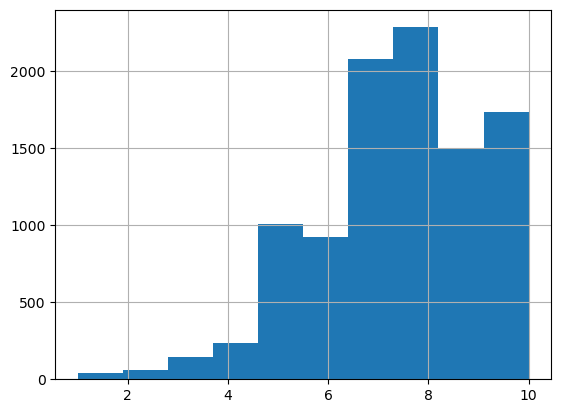

In [36]:
# histogram
books['Rating'].hist()
plt.show()

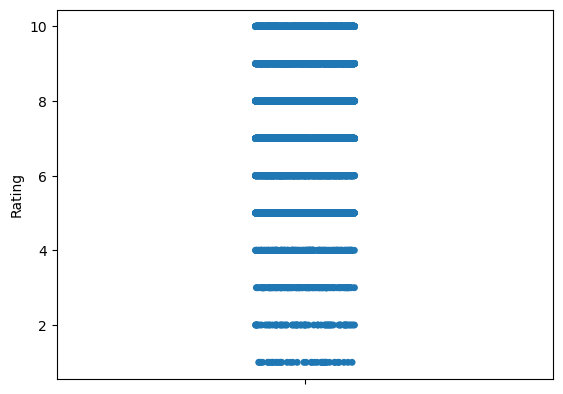

In [37]:
# striper plot
sns.stripplot(y= 'Rating', data=books,jitter=True)
plt.show()

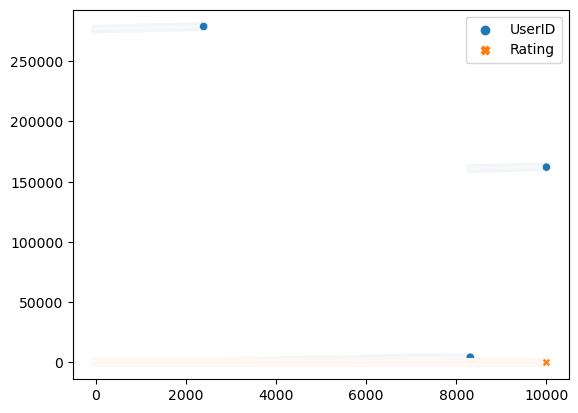

In [38]:
# scatter plot
sns.scatterplot(data = books)
plt.show()

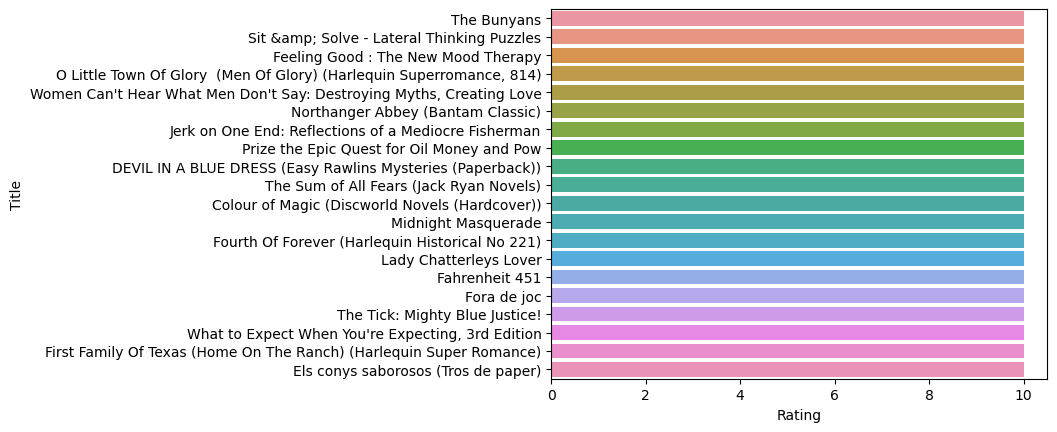

In [39]:
# sorting value and making barplot of first 20 values
books01 = books.sort_values('Rating',ascending=False)
sns.barplot(x='Rating',y='Title',data=books01.head(20))
plt.show()

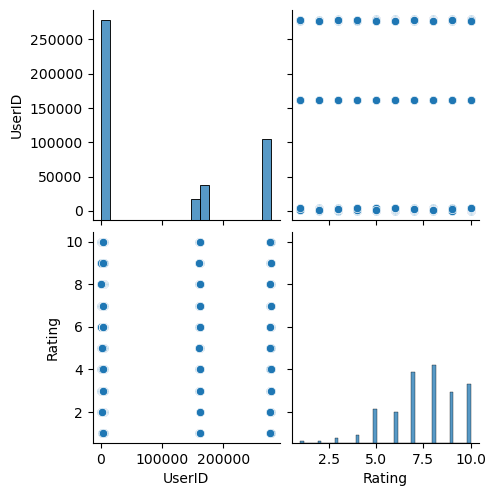

In [40]:
# pairplot
sns.pairplot(books01.dropna())
plt.show()

## Problem solving... Using "TfidfVectorizer" library

In [49]:
books02.head()

,UserID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [42]:
books02.Title

0                                     Classical Mythology
1                                            Clara Callan
2                                    Decision in Normandy
3       Flu: The Story of the Great Influenza Pandemic...
4                                  The Mummies of Urumchi
                              ...                        
9995         American Fried: Adventures of a Happy Eater.
9996                                Cannibal In Manhattan
9997                      How to Flirt: A Practical Guide
9998                                             Twilight
9999                         Kids Say the Darndest Things
Name: Title, Length: 10000, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a Tfidf Vectorizer to remove all stop words
Tfidf = TfidfVectorizer(stop_words = 'english')   #taking stop words from tfid vectorizer 

# replacing the NaN values in overview column with
# empty string
books02.Title.isna().sum()
books02.Title = books02.Title.fillna(" ")

In [44]:
# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrics = Tfidf.fit_transform(books02.Title)
tfidf_matrics.shape

(10000, 11436)

with the above matrix we need to find the 
similarity score
There are several metrics for this
such as the euclidean, the Pearson and 
the cosine similarity scores

For now we will be using cosine similarity matrix
A numeric quantity to represent the similarity 
between 2 things 
Cosine similarity - metric is independent of 
magnitude and easy to calculate 

cosine(x,y)= (x.y⊺)/(||x||.||y||)

In [45]:
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_metrics = linear_kernel(tfidf_matrics,tfidf_matrics)

# creating a mapping of anime name to index number
Title_index = pd.Series(books02.index,index=books02['Title']).drop_duplicates()

In [46]:
Title_index['Decision in Normandy']

2

In [47]:
# making func. for finding cosine score 
def get_books02_recommendations(Name,topN):
    
   
    #topN = 10
    # Getting the movie index using its title 
    UserID = Title_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_metrics[UserID]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    
    # Get the scores of top 10 most similar anime's 
    cosine_scores_10 = cosine_scores[0:topN+1]
    
    # Getting the anime index 
    books02_idx  =  [i[0] for i in cosine_scores_10]
    books02_scores =  [i[1] for i in cosine_scores_10]
    
    # Similar movies and scores
    books02_similar_show = pd.DataFrame(columns=["Title","Score"])
    books02_similar_show["Title"] = books02.loc[books02_idx,"Title"]
    books02_similar_show["Score"] = books02_scores
    books02_similar_show.reset_index(inplace=True)  
    books02_similar_show.drop(["index"],axis=1,inplace=True)
    print (books02_similar_show)
    #return (anime_similar_show)

In [48]:
# and this is a top 5 recommendation for "Cannibal In Manhattan" title, u can change the title 
get_books02_recommendations("Cannibal In Manhattan",topN=5)

                                               Title     Score
0                              Cannibal In Manhattan  1.000000
1                                   Manhattan Memoir  0.493954
2                        Manhattan, When I Was Young  0.472803
3                               Kissing in Manhattan  0.412991
4                                Manhattan Hunt Club  0.397967
5  Compass American Guides: Manhattan, 4th Editio...  0.316049


And here I have tried another method (TfidfVectorizer) to solve this perticuler problem , if anything is wrong in it or any mistake i have made the please revert me back i will correct it 100% sure. here I have tried to make cosine similarities as well